# 直方图的定义与应用

## 定义

直方图是一种描述数据的分布

通过将连续变量划分成一系列区间，统计区间频率，并用来表示，以表征其统计特征

在图像处理中，直方图可以用来表示图像中像素值的分布状况，描述不同灰度级的像素在图像中的占比

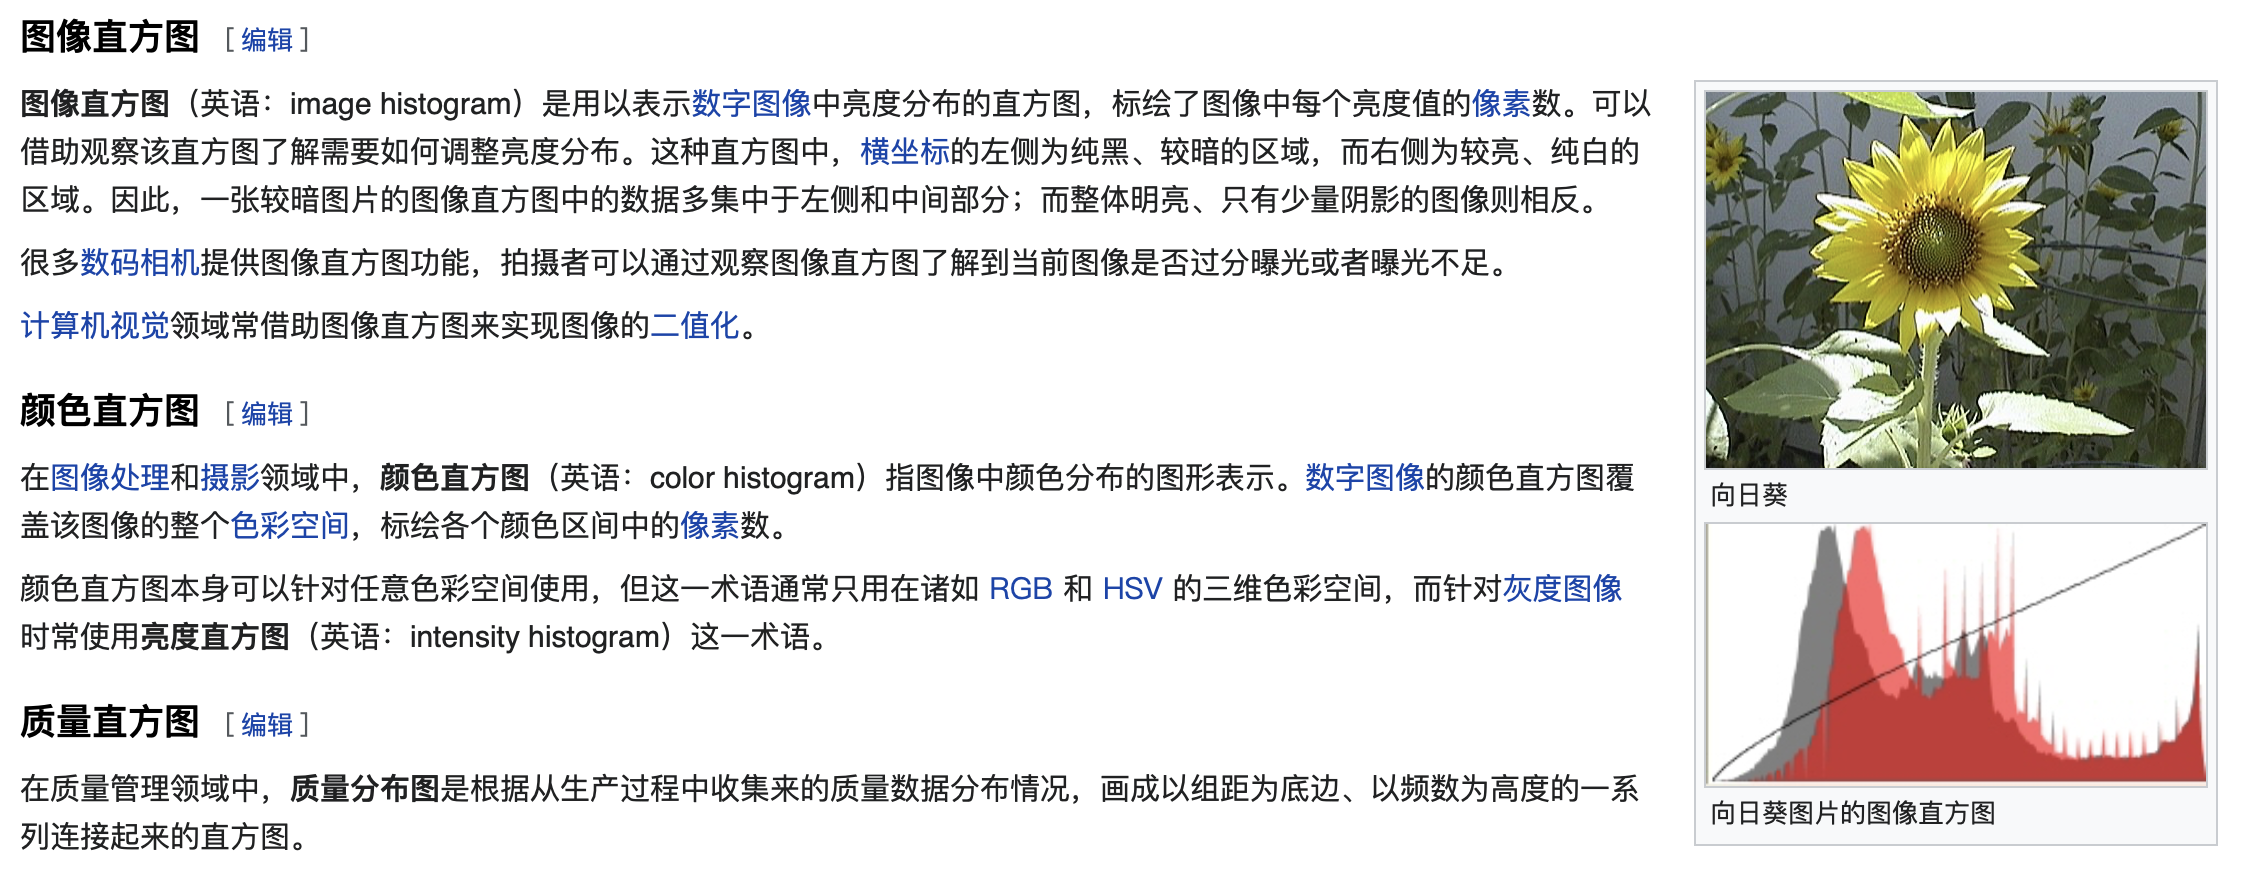

## 应用简介

1. 图像增强。通过调整像素值，让图像的像素复合某种统计特性，达到增强图像的目的

2. 分割。利用直方图来将图像划分为多个区域，从而进行目标分割

3. 像素的统计特性，可以作为图像的一种特征，用于对图像内容进行分类、检索、压缩

## 一个简单的绘制直方图的例子

(443, 590)


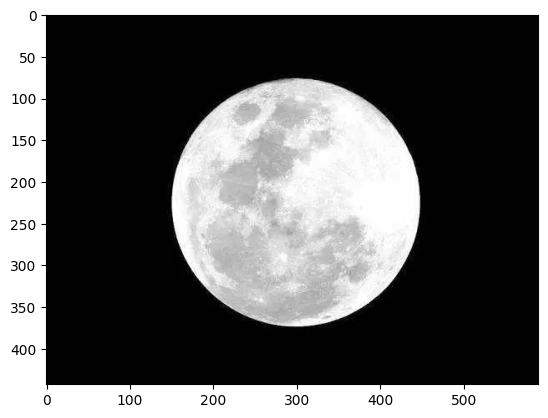

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../../dataset/moon.jpeg', 0)
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()


In [16]:
hist = cv2.calcHist([img], [0], None, [16], [0, 256])
hist /= float(img.shape[0] * img.shape[1])
print(hist[:5])
print(hist[-5:])

[[7.2993076e-01]
 [2.6705437e-03]
 [7.3076482e-04]
 [4.5911927e-04]
 [3.4051345e-04]]
[[0.03984007]
 [0.04061292]
 [0.03844358]
 [0.04712094]
 [0.09185446]]


关于`cv2.calcHist`函数的说明

```
hist = cv2.calcHist(images, channels, mask, histSize, ranges, accumulate)
```

- images: 源图像
- channels：参与计算直方图的通道
- mask：一个可选的掩膜，它与源图像具有相同的尺寸，用于指定计算直方图的区域。例如，可以通过指定一个矩形来计算图像的某个区域的直方图。
- histSize：表示要计算的直方图的大小，以方括号形式传入。如果输入图像是灰度图像，则为灰度级别数；如果是彩色图像，则可以对每个通道指定不同的大小，例如 [256, 256, 256] 表示每个通道的直方图大小为 256。
- ranges：表示像素值的范围，以方括号形式传入。如果输入图像是灰度图像，则范围应该是 [0, 256]；如果是彩色图像，则可以为每个通道指定不同的范围，例如 [0, 256, 0, 256, 0, 256] 表示每个通道的范围分别为 [0, 256]。
- accmulate：一个可选的参数，用于指定是否要累加直方图。如果指定为 True，则计算整幅图像的直方图；如果指定为 False，则只计算当前区域的直方图。


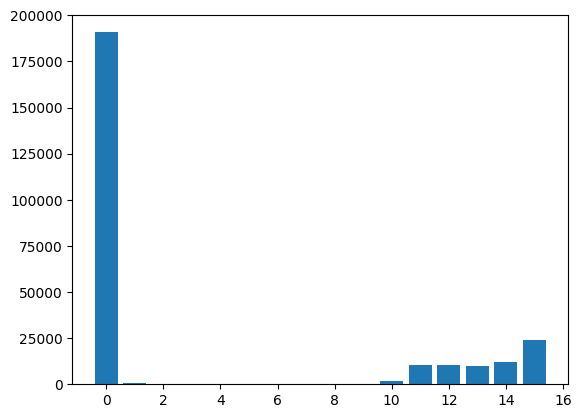

In [27]:
plt.bar(range(16), hist.ravel())
plt.show()

### 另一种更常见的实现方式如下

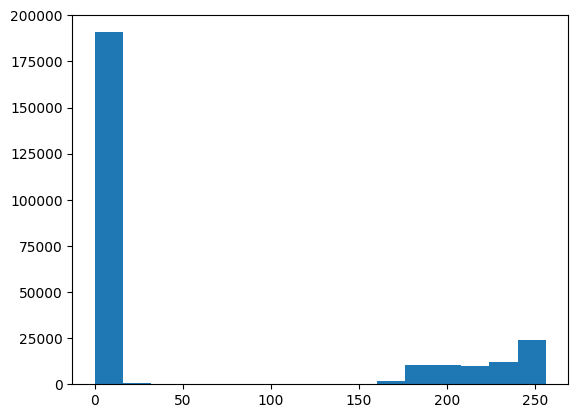

In [31]:
hist, bins = np.histogram(img.flatten(), bins=16, range=[0, 256])
plt.hist(img.flatten(), bins=bins)
plt.show()

关于np.histagram的用法：

```
hist, bins = np.histogram(a, bins=10, range=None, normed=False, weights=None, density=None)
```

- a: 输入的一维数组。
- bins: 直方图的bin数量，也可以指定每个bin的边界，如[0, 10, 20, 30, 40]。
- range: 直方图统计的范围。
- normed和density：两个参数效果相同，设置是否对结果进行归一化。


## 直方图均衡化

直方图最广泛的应用之一，就是直方图均衡化。

直方图均衡化，是一种对**图像增强**的方法：通过重新分配像素值的灰度级，来增强图像的对比度。

#### 基本思想

将直方图变换为一个均匀分布的直方图，使得像素值更加均匀，从而达到增强图像的目的。

通常，直方图中呈现尖峰的位置，说明处于该值的像素较为接近

而直方图均衡化后，可以令这些像素取值更加分散，因此视觉上可以将不明显的物体与周围物体区分开来

#### 主要方法

1. 全局直方图均衡化

2. 局部直方图均衡化

3. 对数变换均衡化

4. 自适应直方图均衡化

5. 双直方图均衡化

[190782 191480 191671 191791 191880 191963 192031 192112 192208 192343
 193970 204383 214998 225046 237362 261370]


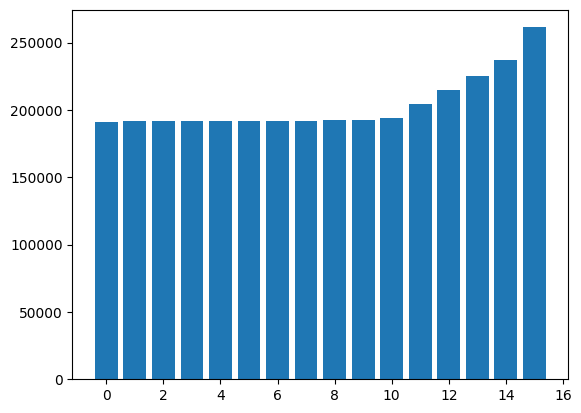

In [45]:
cdf = hist.cumsum()  # 先统计每个区间的像素总数的累加
print(cdf)
plt.bar(range(16), cdf.ravel())
plt.show()

[139257.64825343 139767.13991659 139906.55668975 139994.14837969
 140059.1122164  140119.69646861 140169.33175957 140228.45615029
 140298.52950224 140397.07015342 141584.66748288 149185.43637755
 156933.65128362 164267.99545472 173257.82256571 190782.        ] 190782 261370 0.7299307495121858


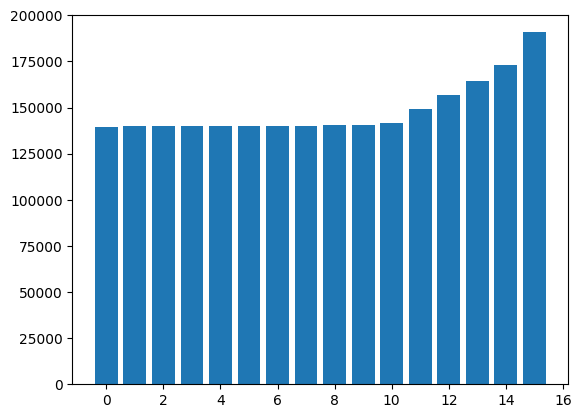

In [48]:
cdf_norm = cdf * hist.max() / cdf.max()
print(cdf_norm, hist.max(), cdf.max(), hist.max() / cdf.max())
plt.bar(range(16), cdf_norm.ravel())
plt.show()